In [1]:
import pathlib
import sys

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

sys.path.append(str(pathlib.PurePath('..', '..', 'src')))
from linear_geodesic_optimization.data import input_network, tomography
from linear_geodesic_optimization import plot

In [2]:
path_probes = pathlib.PurePath('..', 'Internet2', 'probes.csv')
path_links = pathlib.PurePath('..', 'Internet2', 'measurements', '20240804190000.csv')
graph = input_network.get_graph_from_csvs(path_probes, path_links, clustering_distance=500000, should_compute_curvatures=False, directed=True, symmetrize=True)

routes = tomography.get_shortest_routes(graph, 'rtt')
traffic_matrix = tomography.compute_traffic_matrix(graph, routes, 'throughput')

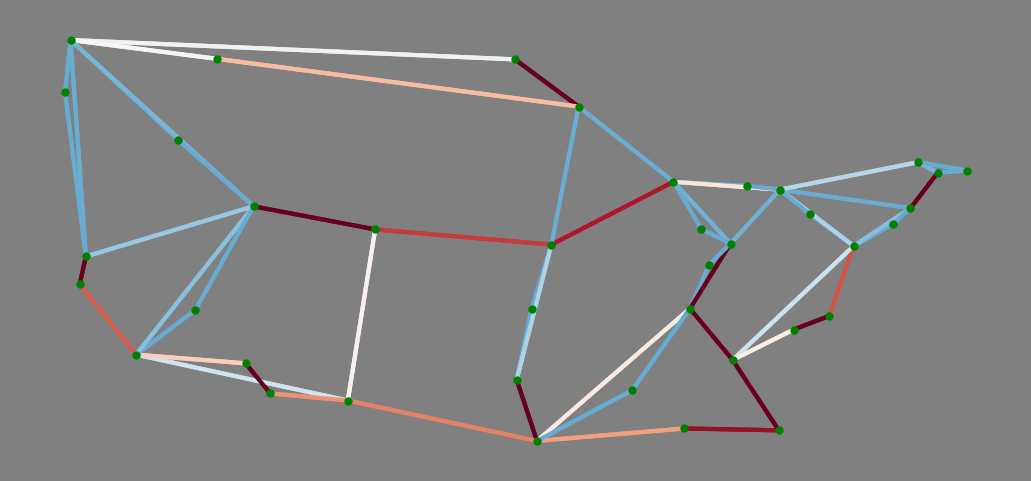

In [3]:
graph_curvatures = input_network.compute_ricci_curvatures(
    graph.copy(), weight_label='throughputs',
    routes=routes, traffic_matrix=traffic_matrix
)

fig, ax = plt.subplots(1, 1, facecolor='#808080')
fig.set_dpi(200)
plot.get_network_plot(graph_curvatures, ax=ax)
plt.show()

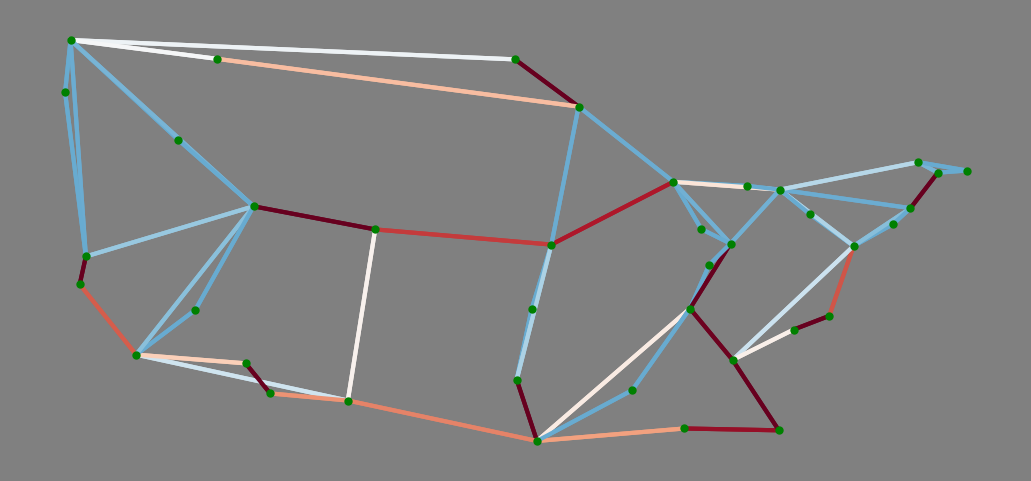

In [4]:
graph_curvatures_optimal = input_network.compute_ricci_curvatures(
    graph.copy(), weight_label='throughputs',
    routes=routes, traffic_matrix=traffic_matrix, force_optimal_transport=True
)

fig, ax = plt.subplots(1, 1, facecolor='#808080')
fig.set_dpi(200)
plot.get_network_plot(graph_curvatures_optimal, ax=ax)
plt.show()

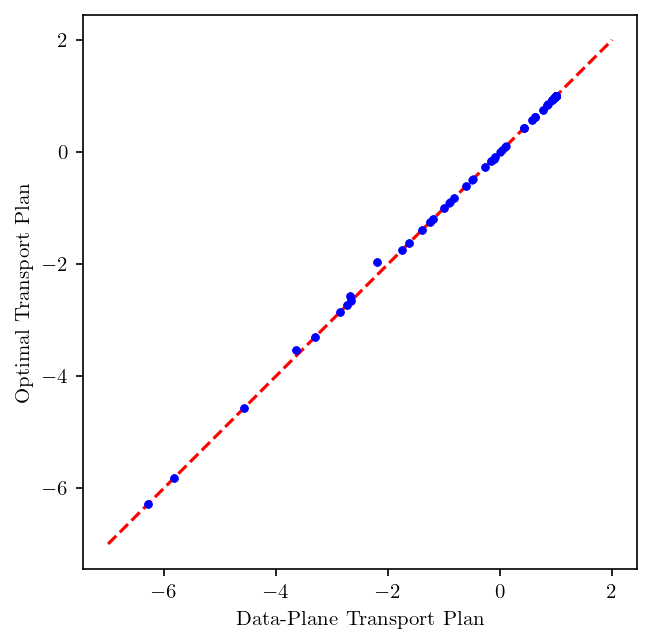

In [5]:
fig, ax = plt.subplots(1, 1)
fig.set_dpi(150)
x = np.array([graph_curvatures.edges[edge]['ricciCurvature'] for edge in graph.edges])
y = np.array([graph_curvatures_optimal.edges[edge]['ricciCurvature'] for edge in graph.edges])
ax.plot([-7, 2], [-7, 2], 'r--')
ax.plot(
    x, y, 'b.'
)
ax.set_aspect('equal')
ax.set_xlabel('Data-Plane Transport Plan')
ax.set_ylabel('Optimal Transport Plan')
plt.show()

In [6]:
differences = list(sorted([
    (np.abs(kappa - kappa_optimal), u, v, kappa, kappa_optimal)
    for u, v in graph.edges
    for kappa in (graph_curvatures.edges[u, v]['ricciCurvature'],)
    for kappa_optimal in (graph_curvatures_optimal.edges[u, v]['ricciCurvature'],)
], reverse=True))
print(f'{len(differences)} total edges')
print('Top 10 differences in curvature:')
for difference, u, v, kappa, kappa_optimal in differences[:10]:
    print(f'\t{u}, {v}: {difference:0.4f} ({kappa:0.4f} vs. {kappa_optimal:0.4f})')

128 total edges
Top 10 differences in curvature:
	ATLA, NASH: 0.2352 (-2.1946 vs. -1.9594)
	NASH, ATLA: 0.2347 (-2.1916 vs. -1.9569)
	CINC, NASH: 0.1203 (-2.6856 vs. -2.5653)
	NASH, CINC: 0.1202 (-2.6839 vs. -2.5637)
	DALL, HOUH: 0.1185 (-3.6459 vs. -3.5274)
	HOUH, DALL: 0.1185 (-3.6475 vs. -3.5290)
	DENV, KANS: 0.0069 (-1.4013 vs. -1.3944)
	KANS, DENV: 0.0066 (-1.4012 vs. -1.3946)
	DENV, SALT: 0.0049 (-2.6569 vs. -2.6520)
	SALT, DENV: 0.0047 (-2.6576 vs. -2.6528)
